In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Initial Data Exploration

## Data Description

The dataset is a subset of the ParaNMT corpus (50M sentence pairs). The filtered ParaNMT-detox corpus (500K sentence pairs) can be downloaded from [here](https://github.com/skoltech-nlp/detox/releases/download/emnlp2021/filtered_paranmt.zip). This is the main dataset for the assignment detoxification task.

The data is given in the `.tsv` format, means columns are separated by `\t` symbol.

| Column | Type | Discription | 
| ----- | ------- | ---------- |
| reference | str | First item from the pair | 
| ref_tox | float | toxicity level of reference text | 
| translation | str | Second item from the pair - paraphrazed version of the reference|
| trn_tox | float | toxicity level of translation text |
| similarity | float | cosine similarity of the texts |
| lenght_diff | float | relative length difference between texts |

## Dataset loading


In [5]:
data = pd.read_csv('../data/raw/filtered.tsv', sep='\t', index_col=0)

In [6]:
data

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
...,...,...,...,...,...,...
577772,You didn't know that Estelle had stolen some f...,you didn't know that Estelle stole your fish f...,0.870322,0.030769,0.000121,0.949143
577773,It'il suck the life out of you!,you'd be sucked out of your life!,0.722897,0.058824,0.996124,0.215794
577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049
577775,They called me a fucking hero. The truth is I ...,"they said I was a hero, but I didn't care.",0.679613,0.358209,0.991945,0.000124


## Data exploration

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 30.9+ MB


In [8]:
data.describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.541372,0.434490
std,0.092695,0.108057,0.457571,0.458904
min,0.600001,0.000000,0.000033,0.000033
25%,0.681105,0.066667,0.012171,0.000707
50%,0.754439,0.141791,0.806795,0.085133
75%,0.831244,0.238095,0.990469,0.973739
max,0.950000,0.400000,0.999724,0.999730


So far, we can say:
1. Dataset has no empty values
2. Similarity of the sentences varies from 0.6 to 0.95 with a mean of 0.76 and a standard deviation of 0.09, which is quite good.
3. Length difference has mean of 0.15, which means the sentences don't vary much in length.
4. Mean toxicity of reference text is higher than translation text. However, both of these values are high enough that it makes me think some sentences are swapped. 

Let's take a closer look at the toxicity values.

## Toxicity analysis

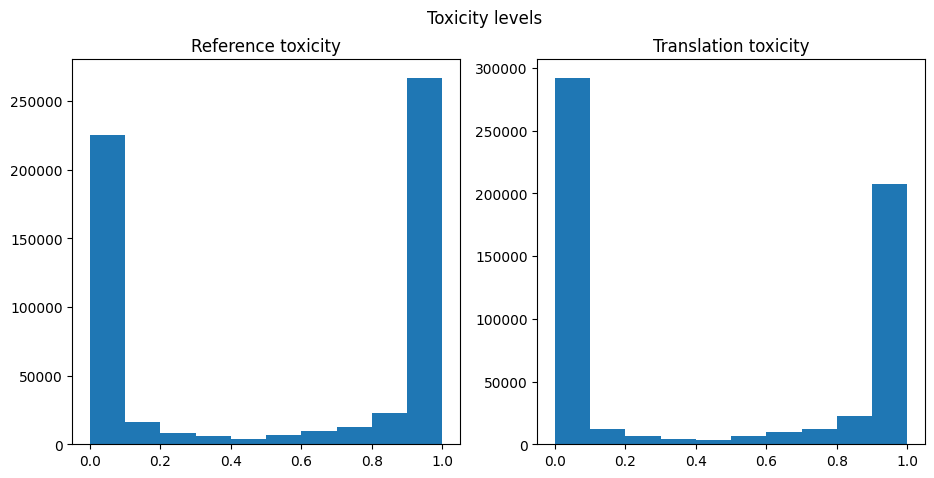

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Toxicity levels')

ax1.hist(data.ref_tox)
ax1.set_title('Reference toxicity')
ax2.hist(data.trn_tox)
ax2.set_title('Translation toxicity')
plt.show()

As we can see, toxic sentences are in both categories. My suggestion: sort the sentences so that the more **toxic variants are in the reference column and the detoxified ones are in the translation**.

## Preprocessing

In [65]:
def preprocess(data):
    for i, row in data.iterrows():
        if row['ref_tox'] < row['trn_tox']:
            data.at[i, 'reference'] = row['translation']
            data.at[i, 'translation'] = row['reference']
            
            data.at[i, 'ref_tox'] = row['trn_tox']
            data.at[i, 'trn_tox'] = row['ref_tox']

In [66]:
preprocess(data)

In [67]:
data.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
2,"well, we can spare your life.","Well, we could spare your life, for one.",0.919051,0.268293,0.985068,0.213313
3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402


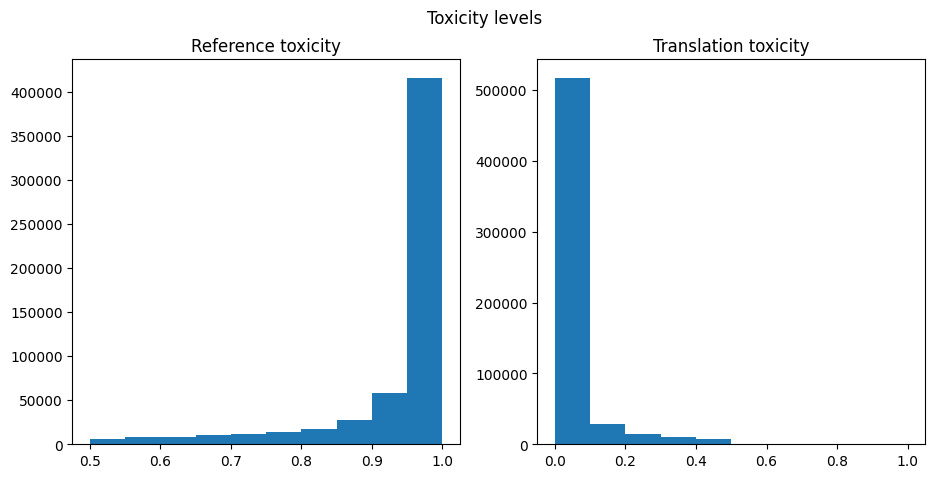

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Toxicity levels')

ax1.hist(data.ref_tox)
ax1.set_title('Reference toxicity')
ax2.hist(data.trn_tox)
ax2.set_title('Translation toxicity')
plt.show()

For better data accuracy, we can keep rows with reference toxicity above 0.85 and translation toxicity below 0.15. I will also leave sentences with a similarity of more than 0.7.

In [72]:
data = data[(data['ref_tox'] > 0.85) & (data['trn_tox'] < 0.15) & (data['similarity'] > 0.68)]
data.reset_index(drop=True, inplace=True)

In [73]:
data

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
2,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402
3,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846
4,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.720482,0.187500,0.963680,0.148710
...,...,...,...,...,...,...
341400,And now nobody wanted to face this madman from...,"now, however, no one wanted to face the madman...",0.799664,0.134328,0.933597,0.042693
341401,Come here and bite me some more.,come here and bite me a little bit.,0.842079,0.083333,0.859086,0.024409
341402,I am so crazy nuts about you guys.,I'm so crazy about you guys.,0.934512,0.171429,0.973442,0.000709
341403,you didn't know that Estelle stole your fish f...,You didn't know that Estelle had stolen some f...,0.870322,0.030769,0.949143,0.000121


## Text analysis

In [76]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Delete stop words
    stop_words = set(stopwords.words("english"))
    clean_tokens = [word for word in tokens if word not in stop_words]

    return clean_tokens

In [84]:
reference_texts = []
for i, row in data.iterrows():
    reference_texts += clean_text(row['reference'])

In [85]:
translation_texts = []
for i, row in data.iterrows():
    translation_texts += clean_text(row['translation'])

In [86]:
from collections import Counter
ref_count = Counter(reference_texts)
trn_count = Counter(translation_texts)

ref_count.most_common(50)

[('fucking', 22850),
 ('shit', 20933),
 ('like', 20072),
 ('dont', 20038),
 ('youre', 18374),
 ('im', 18069),
 ('get', 15080),
 ('damn', 14717),
 ('fuck', 13982),
 ('know', 13558),
 ('hell', 12576),
 ('kill', 12197),
 ('na', 11453),
 ('want', 11263),
 ('gon', 10308),
 ('one', 10253),
 ('hes', 9848),
 ('got', 8210),
 ('man', 8184),
 ('would', 7899),
 ('think', 7558),
 ('ill', 7352),
 ('die', 7140),
 ('go', 7125),
 ('going', 6831),
 ('well', 6369),
 ('us', 6221),
 ('crazy', 6171),
 ('little', 6083),
 ('shut', 6053),
 ('said', 5992),
 ('sex', 5775),
 ('back', 5743),
 ('right', 5624),
 ('could', 5581),
 ('thats', 5448),
 ('stupid', 5426),
 ('ass', 5376),
 ('look', 5341),
 ('people', 5259),
 ('take', 5224),
 ('time', 5153),
 ('killed', 5108),
 ('tell', 5070),
 ('didnt', 5008),
 ('cant', 4965),
 ('even', 4836),
 ('dead', 4826),
 ('see', 4766),
 ('give', 4675)]

In [87]:
trn_count.most_common(50)

[('dont', 20203),
 ('im', 18989),
 ('like', 18570),
 ('youre', 17100),
 ('get', 15497),
 ('know', 13537),
 ('want', 11181),
 ('one', 11081),
 ('would', 8819),
 ('hell', 8808),
 ('hes', 8578),
 ('man', 8207),
 ('think', 7947),
 ('go', 7330),
 ('got', 7255),
 ('going', 7169),
 ('ill', 7136),
 ('na', 7131),
 ('gon', 6562),
 ('killed', 6276),
 ('us', 6258),
 ('well', 6207),
 ('take', 6068),
 ('said', 6016),
 ('back', 5996),
 ('little', 5900),
 ('could', 5728),
 ('thats', 5630),
 ('even', 5590),
 ('right', 5352),
 ('didnt', 5344),
 ('time', 5328),
 ('crazy', 5317),
 ('people', 5311),
 ('look', 5292),
 ('tell', 5169),
 ('cant', 5051),
 ('come', 4871),
 ('oh', 4868),
 ('kill', 4842),
 ('bad', 4700),
 ('see', 4690),
 ('really', 4585),
 ('dead', 4562),
 ('guy', 4301),
 ('die', 4226),
 ('make', 4090),
 ('put', 4066),
 ('life', 4053),
 ('head', 4005)]

Among the frequent words of toxic texts, there are many offensive and "toxic" words, while the translation texts have more words of ordinary speech.

## Some conclusions
After some data exploration I can draw some conclusions:
1. I cleaned data: swapped out the mixed-up sentences and kept the most representative data (sentences with clearly large or small toxicity levels and sentences with the highest similarity coefficient)
2. The level of toxicity depends on the presence of toxic words in the text.

The main goals of detoxification are to **reduce the toxicity** of the sentence and **preserve meaning**. These metrics can be used to measure the performance of algorithms.

Some ideas on how to solve this problem:
1. One of the basic ideas to detoxify text is to simply remove the "toxic" words from the it.
2. A more complicated idea is to replace toxic words with their non-toxic synonyms (for example, using BERT model).
3. Use transformers to replace the toxic part of a sentence, not just to replace a single word.